# IMPORTING LIBRARIES

In [49]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt




# DATA SIZE

In [52]:
data = pd.read_csv('shuffled_reviews.csv')
data


,deceptive,hotel,polarity,source,text
0,deceptive,swissotel,positive,MTurk,This is the hotel for the discriminating busin...
1,truthful,amalfi,positive,TripAdvisor,"What a wonderful experience, super great, help..."
2,truthful,talbott,positive,TripAdvisor,I stayed at the Talbott twice in the last few ...
3,truthful,swissotel,positive,TripAdvisor,My boyfriend and I were amazed by the breathta...
4,truthful,knickerbocker,negative,Web,"Rude, rude, rude! We stayed here on July 4th w..."
...,...,...,...,...,...
1595,truthful,amalfi,negative,Web,Stayed at the Amalfi hotel in Chicago this mon...
1596,deceptive,homewood,negative,MTurk,My husband and I were sorely disappointed in t...
1597,truthful,omni,negative,Web,We experienced bed bugs in our room while stay...
1598,deceptive,james,negative,MTurk,I had a business trip coming up in Chicago and...


In [53]:
data.head()

,deceptive,hotel,polarity,source,text
0,deceptive,swissotel,positive,MTurk,This is the hotel for the discriminating busin...
1,truthful,amalfi,positive,TripAdvisor,"What a wonderful experience, super great, help..."
2,truthful,talbott,positive,TripAdvisor,I stayed at the Talbott twice in the last few ...
3,truthful,swissotel,positive,TripAdvisor,My boyfriend and I were amazed by the breathta...
4,truthful,knickerbocker,negative,Web,"Rude, rude, rude! We stayed here on July 4th w..."


In [55]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [57]:
data.describe().transpose()

,count,unique,top,freq
deceptive,1600,2,deceptive,800
hotel,1600,20,swissotel,80
polarity,1600,2,positive,800
source,1600,3,MTurk,800
text,1600,1596,My daughter and I woke in the morning wanting ...,2


# MISSING VALUE CHECK

In [61]:
missing_values = data.isnull().sum()
missing_values

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

# REMOVE DUPLICATES

In [64]:
data = data.drop_duplicates()
data

,deceptive,hotel,polarity,source,text
0,deceptive,swissotel,positive,MTurk,This is the hotel for the discriminating busin...
1,truthful,amalfi,positive,TripAdvisor,"What a wonderful experience, super great, help..."
2,truthful,talbott,positive,TripAdvisor,I stayed at the Talbott twice in the last few ...
3,truthful,swissotel,positive,TripAdvisor,My boyfriend and I were amazed by the breathta...
4,truthful,knickerbocker,negative,Web,"Rude, rude, rude! We stayed here on July 4th w..."
...,...,...,...,...,...
1595,truthful,amalfi,negative,Web,Stayed at the Amalfi hotel in Chicago this mon...
1596,deceptive,homewood,negative,MTurk,My husband and I were sorely disappointed in t...
1597,truthful,omni,negative,Web,We experienced bed bugs in our room while stay...
1598,deceptive,james,negative,MTurk,I had a business trip coming up in Chicago and...


# CLEAN TEXT DATA

In [67]:
# Sample clean_text function
def clean_text(text):
    text = str(text).lower()  # ensure it's string and lowercase
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

# Show original vs cleaned side by side
print(data[['text', 'cleaned_text']].sample(5)) 


                                                   text  \
1382  Seriously overpriced The room was clean and co...   
1042  The Homewood Suites by Hilton, in downtown Chi...   
1189  Stayed valentines weekend. Got the 5th floor w...   
596   When we were stranded in Chicago for two days ...   
231   great bed, but when I first came in, I request...   

                                           cleaned_text  
1382  seriously overpriced the room was clean and co...  
1042  the homewood suites by hilton in downtown chic...  
1189  stayed valentines weekend got the th floor wit...  
596   when we were stranded in chicago for two days ...  
231   great bed but when i first came in i requested...  


C:\Users\manik\AppData\Local\Temp\ipykernel_17692\662741022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].apply(clean_text)


# REMOVE STOPWORDS

In [69]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply it
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)
data['cleaned_text']
print(data[['text', 'cleaned_text']].head(5)) 

                                                text  \
0  This is the hotel for the discriminating busin...   
1  What a wonderful experience, super great, help...   
2  I stayed at the Talbott twice in the last few ...   
3  My boyfriend and I were amazed by the breathta...   
4  Rude, rude, rude! We stayed here on July 4th w...   

                                        cleaned_text  
0  hotel discriminating business traveler offers ...  
1  wonderful experience super great helpful frien...  
2  stayed talbott twice last weeks pleased every ...  
3  boyfriend amazed breathtaking view lake michig...  
4  rude rude rude stayed july th weekend drove mi...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\manik\AppData\Local\Temp\ipykernel_17692\4160150618.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)


# TOKENIZATION

In [71]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer data (if not already)
nltk.download('punkt')

# Assuming you already have your dataset loaded with cleaned text
# Example:
# data = pd.read_csv("your_dataset.csv")

# Tokenize the cleaned_text column
def tokenize_text(cleaned_text):
    return word_tokenize(cleaned_text)

# Apply tokenization
data['tokens'] = data['cleaned_text'].apply(tokenize_text)

# Preview the result
print(data[['cleaned_text', 'tokens']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        cleaned_text  \
0  hotel discriminating business traveler offers ...   
1  wonderful experience super great helpful frien...   
2  stayed talbott twice last weeks pleased every ...   
3  boyfriend amazed breathtaking view lake michig...   
4  rude rude rude stayed july th weekend drove mi...   

                                              tokens  
0  [hotel, discriminating, business, traveler, of...  
1  [wonderful, experience, super, great, helpful,...  
2  [stayed, talbott, twice, last, weeks, pleased,...  
3  [boyfriend, amazed, breathtaking, view, lake, ...  
4  [rude, rude, rude, stayed, july, th, weekend, ...  


C:\Users\manik\AppData\Local\Temp\ipykernel_17692\726981751.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['cleaned_text'].apply(tokenize_text)


# LEMMATIZATION

In [73]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Map POS tag to WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Lemmatize from token list
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

# Apply it to your token column
data['lemmatized_tokens'] = data['tokens'].apply(lemmatize_tokens)

# Optional: Join back to string
data['lemmatized_text'] = data['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Preview
print(data[['tokens', 'lemmatized_text']].sample(5))
data.head()

                                                 tokens  \
791   [extravagant, exuberant, experience, stay, hot...   
936   [booked, hotel, room, nights, hotel, online, v...   
1362  [stayed, hotel, last, vacation, windy, city, a...   
1312  [stayed, homewood, suites, downtown, chicago, ...   
1333  [arrived, omni, nd, september, day, stay, took...   

                                        lemmatized_text  
791   extravagant exuberant experience stay hotel al...  
936   booked hotel room night hotel online vendor bo...  
1362  stay hotel last vacation windy city although h...  
1312  stay homewood suite downtown chicago last week...  
1333  arrive omni nd september day stay take ill lea...  


C:\Users\manik\AppData\Local\Temp\ipykernel_17692\4027879616.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lemmatized_tokens'] = data['tokens'].apply(lemmatize_tokens)
C:\Users\manik\AppData\Local\Temp\ipykernel_17692\4027879616.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lemmatized_text'] = data['lemmatized_tokens'].apply(lambda x: ' '.join(x))


,deceptive,hotel,polarity,source,text,cleaned_text,tokens,lemmatized_tokens,lemmatized_text
0,deceptive,swissotel,positive,MTurk,This is the hotel for the discriminating busin...,hotel discriminating business traveler offers ...,"[hotel, discriminating, business, traveler, of...","[hotel, discriminate, business, traveler, offe...",hotel discriminate business traveler offer spa...
1,truthful,amalfi,positive,TripAdvisor,"What a wonderful experience, super great, help...",wonderful experience super great helpful frien...,"[wonderful, experience, super, great, helpful,...","[wonderful, experience, super, great, helpful,...",wonderful experience super great helpful frien...
2,truthful,talbott,positive,TripAdvisor,I stayed at the Talbott twice in the last few ...,stayed talbott twice last weeks pleased every ...,"[stayed, talbott, twice, last, weeks, pleased,...","[stay, talbott, twice, last, week, please, eve...",stay talbott twice last week please every face...
3,truthful,swissotel,positive,TripAdvisor,My boyfriend and I were amazed by the breathta...,boyfriend amazed breathtaking view lake michig...,"[boyfriend, amazed, breathtaking, view, lake, ...","[boyfriend, amazed, breathtaking, view, lake, ...",boyfriend amazed breathtaking view lake michig...
4,truthful,knickerbocker,negative,Web,"Rude, rude, rude! We stayed here on July 4th w...",rude rude rude stayed july th weekend drove mi...,"[rude, rude, rude, stayed, july, th, weekend, ...","[rude, rude, rude, stay, july, th, weekend, dr...",rude rude rude stay july th weekend drive mich...


# TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf_bigram = tfidf_vectorizer.fit_transform(data['lemmatized_text'])
X_tfidf_bigram
print(tfidf_vectorizer.get_feature_names_out()[:20])  # Show first 20 features


['aaa' 'ability' 'able' 'able check' 'able get' 'able relax' 'able stay'
 'able walk' 'absolute' 'absolutely' 'absolutely beautiful'
 'absolutely love' 'ac' 'accept' 'acceptable' 'access' 'access hotel'
 'accessible' 'accommodate' 'accommodation']


In [361]:
import nltk
nltk.download('punkt', force=True)  # Forces a fresh download

import nltk
nltk.data.path.append('C:/Users/SASTRA CHENNAI 22/nltk_data')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [362]:
import nltk

# ✅ Download the correct punkt tokenizer
nltk.download('punkt')

# ✅ This is the correct way to load the English tokenizer
nltk.data.load('tokenizers/punkt/english.pickle')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# LABEL ENCODING 

In [77]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize the label encoder
label_encoder = LabelEncoder()

# Label Encoding for 'deceptive' target attribute (deceptive = 0, truthful = 1)
data['deceptive_encoded'] = label_encoder.fit_transform(data['deceptive']).astype(int)

# Label Encoding for 'polarity' (positive = 1, negative = 0)
if data['polarity'].dtype == 'object':
    data['polarity_encoded'] = label_encoder.fit_transform(data['polarity']).astype(int)

# Keep other categorical columns as they are (without encoding them)
# List of all categorical columns except 'deceptive' and 'polarity' that you don't want to encode
categorical_columns = ['hotel',	'source','text','cleaned_text','tokens','lemmatized_tokens','lemmatized_text'	]  # Replace with your actual categorical column names

# Remove 'deceptive' and 'polarity' from categorical columns list if they are included
categorical_columns = [col for col in categorical_columns if col not in ['deceptive', 'polarity']]

# Keep all columns (encoded and non-encoded) in the cleaned data
data_cleaned = data[['deceptive_encoded', 'polarity_encoded'] + categorical_columns]

# Display the cleaned dataset
data_cleaned.head()


C:\Users\manik\AppData\Local\Temp\ipykernel_17692\2332251927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['deceptive_encoded'] = label_encoder.fit_transform(data['deceptive']).astype(int)
C:\Users\manik\AppData\Local\Temp\ipykernel_17692\2332251927.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity_encoded'] = label_encoder.fit_transform(data['polarity']).astype(int)


,deceptive_encoded,polarity_encoded,hotel,source,text,cleaned_text,tokens,lemmatized_tokens,lemmatized_text
0,0,1,swissotel,MTurk,This is the hotel for the discriminating busin...,hotel discriminating business traveler offers ...,"[hotel, discriminating, business, traveler, of...","[hotel, discriminate, business, traveler, offe...",hotel discriminate business traveler offer spa...
1,1,1,amalfi,TripAdvisor,"What a wonderful experience, super great, help...",wonderful experience super great helpful frien...,"[wonderful, experience, super, great, helpful,...","[wonderful, experience, super, great, helpful,...",wonderful experience super great helpful frien...
2,1,1,talbott,TripAdvisor,I stayed at the Talbott twice in the last few ...,stayed talbott twice last weeks pleased every ...,"[stayed, talbott, twice, last, weeks, pleased,...","[stay, talbott, twice, last, week, please, eve...",stay talbott twice last week please every face...
3,1,1,swissotel,TripAdvisor,My boyfriend and I were amazed by the breathta...,boyfriend amazed breathtaking view lake michig...,"[boyfriend, amazed, breathtaking, view, lake, ...","[boyfriend, amazed, breathtaking, view, lake, ...",boyfriend amazed breathtaking view lake michig...
4,1,0,knickerbocker,Web,"Rude, rude, rude! We stayed here on July 4th w...",rude rude rude stayed july th weekend drove mi...,"[rude, rude, rude, stayed, july, th, weekend, ...","[rude, rude, rude, stay, july, th, weekend, dr...",rude rude rude stay july th weekend drive mich...


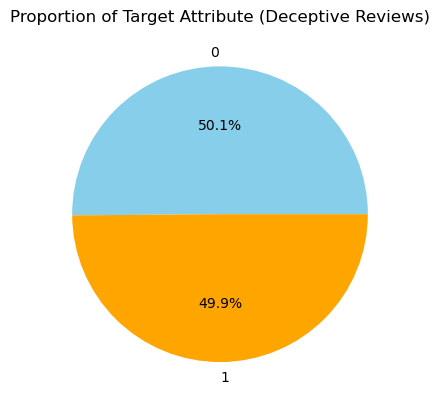

deceptive_encoded
0    800
1    796
Name: count, dtype: int64

In [79]:
# Pie chart for target attribute
data_cleaned['deceptive_encoded'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title("Proportion of Target Attribute (Deceptive Reviews)")
plt.ylabel("")  # Removes default y-axis label
plt.show()
data_cleaned['deceptive_encoded'].value_counts()

# TEXT VISUALIZATION

In [373]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


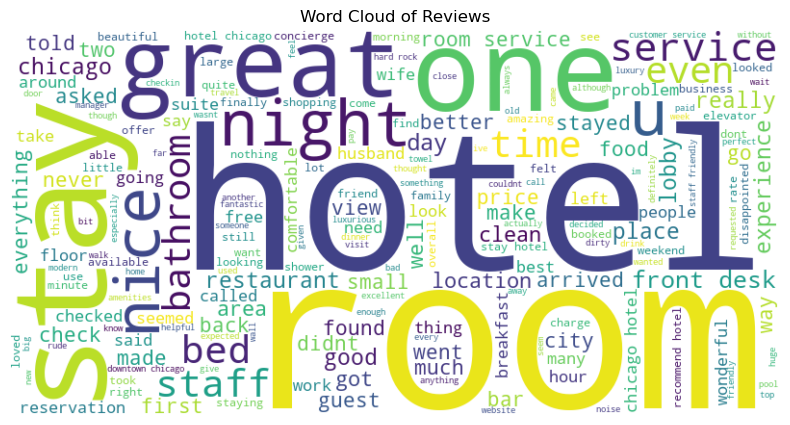

In [81]:
from wordcloud import WordCloud

# Generate word cloud for text column
text_data = ' '.join(data_cleaned['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()




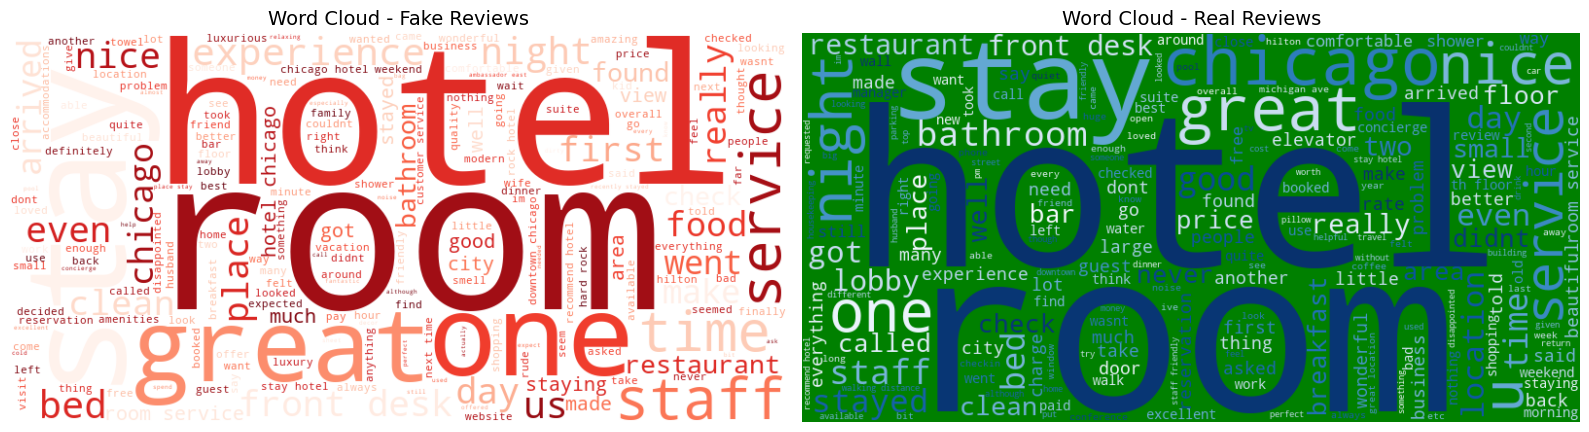

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate fake and real reviews using deceptive_encoded column
fake_reviews = data_cleaned[data_cleaned['deceptive_encoded'] == 0]['cleaned_text']
real_reviews = data_cleaned[data_cleaned['deceptive_encoded'] == 1]['cleaned_text']

# Join all cleaned texts into one string for each category
fake_text = ' '.join(fake_reviews.astype(str))
real_text = ' '.join(real_reviews.astype(str))

# Generate WordClouds
fake_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text)
real_wc = WordCloud(width=800, height=400, background_color='green', colormap='Blues').generate(real_text)

# Plot both WordClouds side by side
plt.figure(figsize=(16, 8))

# Fake reviews
plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake Reviews", fontsize=14)

# Real reviews
plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Real Reviews", fontsize=14)

plt.tight_layout()
plt.show()


In [272]:
data_cleaned.to_csv('cleaned_fake_review_dataset.csv', index=False)
data_cleaned.head()

,deceptive_encoded,polarity_encoded,hotel,source,text,cleaned_text,tokens,lemmatized_tokens,lemmatized_text
0,0,1,swissotel,MTurk,This is the hotel for the discriminating busin...,hotel discriminating business traveler offers ...,"[hotel, discriminating, business, traveler, of...","[hotel, discriminate, business, traveler, offe...",hotel discriminate business traveler offer spa...
1,1,1,amalfi,TripAdvisor,"What a wonderful experience, super great, help...",wonderful experience super great helpful frien...,"[wonderful, experience, super, great, helpful,...","[wonderful, experience, super, great, helpful,...",wonderful experience super great helpful frien...
2,1,1,talbott,TripAdvisor,I stayed at the Talbott twice in the last few ...,stayed talbott twice last weeks pleased every ...,"[stayed, talbott, twice, last, weeks, pleased,...","[stay, talbott, twice, last, week, please, eve...",stay talbott twice last week please every face...
3,1,1,swissotel,TripAdvisor,My boyfriend and I were amazed by the breathta...,boyfriend amazed breathtaking view lake michig...,"[boyfriend, amazed, breathtaking, view, lake, ...","[boyfriend, amazed, breathtaking, view, lake, ...",boyfriend amazed breathtaking view lake michig...
4,1,0,knickerbocker,Web,"Rude, rude, rude! We stayed here on July 4th w...",rude rude rude stayed july th weekend drove mi...,"[rude, rude, rude, stayed, july, th, weekend, ...","[rude, rude, rude, stay, july, th, weekend, dr...",rude rude rude stay july th weekend drive mich...


# LOGISTIC REGRESSION -(TF-IDF)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


# Step 1: Split the data with stratification (if not already done)
y = data_cleaned['deceptive_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_bigram, y, test_size=0.2, random_state=42,stratify=y
)

# Step 2: Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, C=1.5)
log_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = log_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)

print("Logistic Regression Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Performance:
Accuracy  : 0.8781
Precision : 0.8623
Recall    : 0.9000
F1 Score  : 0.8807

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       160
           1       0.90      0.86      0.88       160

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



# SVM USING TF-IDF

Accuracy : 0.9031
Precision: 0.9161
Recall   : 0.8875
F1 Score : 0.9016


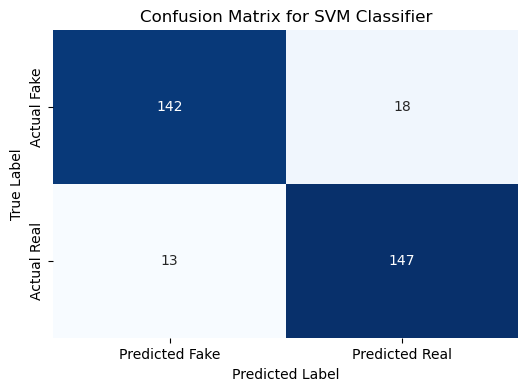

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Target variable
y = data_cleaned['deceptive_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_bigram, y, test_size=0.2, random_state=42,stratify=y
)

# Create an SVM classifier
svm_classifier = SVC(kernel='poly',C=10, 
    gamma='scale',      
     random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake', 'Predicted Real'],
            yticklabels=['Actual Fake', 'Actual Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

